In [85]:
import pandas as pd
import numpy as np

In [86]:
url = "https://news.naver.com/main/read.naver?mode=LSD&mid=shm&sid1=105&oid=015&aid=0004639419"

In [87]:
from bs4 import BeautifulSoup
from wordcloud import WordCloud, ImageColorGenerator

from gensim.summarization.summarizer import summarize
import requests
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36'}
webpage = requests.get(f"{url}",headers=headers)
soup = BeautifulSoup(webpage.content,"html.parser")
title=soup.title.string
content=soup.find('div',attrs={'id':'dic_area'})
content=content.get_text().replace("\n","").replace("// flash 오류를 우회하기 위한 함수 추가function _flash_removeCallback() {}","").replace("\t","").replace(".",". ")

In [88]:
content

'롤러블 디스플레이가 탑재된 갤럭시워치의 예상 렌더링 이미지.  레츠고디지털 캡쳐차세대 스마트폰 폼팩터(특정 기기형태)로 화면이 돌돌 말리는 \'롤러블폰\'이 주목받는 가운데, 롤러블 디스플레이를 장착한 스마트워치도 출시될 것이란 관측이 나오고 있습니다. 정보기술(IT) 매체 렛츠고디지털은 삼성전자가 세계지식재산기구(WIPO)에 출원한 \'롤러블 디스플레이를 탑재한 전자장치\'에 대한 기술 특허가 최근 승인을 받고, 정식 공개됐다고 전했습니다. 해당 특허 문서에 따르면 해당 갤럭시 워치는 콤팩트한 크기의 두 개의 반원형 플렉서블 디스플레이가 탑재된 모습입니다.  평소엔 일반 갤럭시워치와 동일한 모습이지만, 측면 버튼을 누르면 두 디스플레이가 확장되는 형태인데요, 완전히 확장된 화면은 확장되기 전의 사이즈 보다 약 40% 커집니다. 삼성전자는 두 디스플레이 사이에 좁은 프레임을 끼웠습니다.  여기에 사진과 동영상을 캡처할 수 있는 카메라 센서와 플래시가 내장됐습니다.  이러한 방식을 통해 스마트폰이 없이 스마트워치 단독으로 사진과 동영상을 촬영할 수 있을 것으로 보입니다. 평소엔 시간과 간단한 알림 등을 보여줬던 갤럭시워치의 화면이 커지면 더 많은 정보를 보여줄 수 있을 것으로 예상됩니다.  예컨대 화면을 키워 상단 화면으로 콘텐츠를 이용하고, 하단 화면은 키보드로 활용하는 식입니다.  삼성전자는 특허 기술 설명에서 "롤러블 디스플레이가 활용되면 더 넓은 화면과 휴대성을 동시에 제공할 수 있고, 사용자 경험 개선 등 다양한 효과를 제공할 것"이라고 말했습니다. 삼성전자가 WIPO에 특허 출원한 \'롤러블 디스플레이를 탑재한 전자장치\' 모습.  레츠고디지털 캡쳐삼성전자가 이러한 콘셉트의 제품을 언제 시장에 내놓을 지는 알려지지 않았습니다.  특허를 출원했다고 해서 모든 제품이 정식 출시되는 것도 아니기 때문입니다.  다만 삼성전자의 자회사인 삼성디스플레이는 그간 여러 공식 석상에서 다양한 롤러블 디스플레이 시제품을 선보였던 만큼 롤러블 갤럭시워치도 출시될 가능성

In [89]:
l = []
l.append(content)
d = {}
d['본문'] = l
z = pd.DataFrame.from_dict(d)
z

,본문
0,롤러블 디스플레이가 탑재된 갤럭시워치의 예상 렌더링 이미지. 레츠고디지털 캡쳐차세...


In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [91]:
vectorizer = TfidfVectorizer()
matrix = vectorizer.fit_transform(d['본문'])

In [92]:
word2id = defaultdict(lambda : 0)
for idx, feature in enumerate(vectorizer.get_feature_names_out()):
    word2id[feature] = idx
l=[]
for i, sent in enumerate(d['본문']):
    print('====== document[%d] ======' % i)
    l.append([ (token, matrix[i, word2id[token]]) for token in sent.split() ] )

====== document[0] ======


In [93]:

print(l)


[[('롤러블', 0.29848100289785456), ('디스플레이가', 0.17056057308448833), ('탑재된', 0.08528028654224416), ('갤럭시워치의', 0.08528028654224416), ('예상', 0.04264014327112208), ('렌더링', 0.04264014327112208), ('이미지.', 0.04264014327112208), ('레츠고디지털', 0.08528028654224416), ('캡쳐차세대', 0.04264014327112208), ('스마트폰', 0.04264014327112208), ('폼팩터(특정', 0.04264014327112208), ('기기형태)로', 0.04264014327112208), ('화면이', 0.12792042981336624), ('돌돌', 0.04264014327112208), ('말리는', 0.04264014327112208), ("'롤러블폰'이", 0.04264014327112208), ('주목받는', 0.04264014327112208), ('가운데,', 0.04264014327112208), ('롤러블', 0.29848100289785456), ('디스플레이를', 0.17056057308448833), ('장착한', 0.04264014327112208), ('스마트워치도', 0.04264014327112208), ('출시될', 0.08528028654224416), ('것이란', 0.04264014327112208), ('관측이', 0.04264014327112208), ('나오고', 0.04264014327112208), ('있습니다.', 0.04264014327112208), ('정보기술(IT)', 0.04264014327112208), ('매체', 0.04264014327112208), ('렛츠고디지털은', 0.04264014327112208), ('삼성전자가', 0.08528028654224416), ('세계지식재산기구(WIPO)에', 0.04264

In [94]:
dic={}

dic['tf-idf']=l

In [95]:
dic=pd.DataFrame.from_dict(dic)

In [96]:
dic['tf-idf'][0]

[('롤러블', 0.29848100289785456),
 ('디스플레이가', 0.17056057308448833),
 ('탑재된', 0.08528028654224416),
 ('갤럭시워치의', 0.08528028654224416),
 ('예상', 0.04264014327112208),
 ('렌더링', 0.04264014327112208),
 ('이미지.', 0.04264014327112208),
 ('레츠고디지털', 0.08528028654224416),
 ('캡쳐차세대', 0.04264014327112208),
 ('스마트폰', 0.04264014327112208),
 ('폼팩터(특정', 0.04264014327112208),
 ('기기형태)로', 0.04264014327112208),
 ('화면이', 0.12792042981336624),
 ('돌돌', 0.04264014327112208),
 ('말리는', 0.04264014327112208),
 ("'롤러블폰'이", 0.04264014327112208),
 ('주목받는', 0.04264014327112208),
 ('가운데,', 0.04264014327112208),
 ('롤러블', 0.29848100289785456),
 ('디스플레이를', 0.17056057308448833),
 ('장착한', 0.04264014327112208),
 ('스마트워치도', 0.04264014327112208),
 ('출시될', 0.08528028654224416),
 ('것이란', 0.04264014327112208),
 ('관측이', 0.04264014327112208),
 ('나오고', 0.04264014327112208),
 ('있습니다.', 0.04264014327112208),
 ('정보기술(IT)', 0.04264014327112208),
 ('매체', 0.04264014327112208),
 ('렛츠고디지털은', 0.04264014327112208),
 ('삼성전자가', 0.08528028654224416)

In [97]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [98]:
from wordcloud import WordCloud, ImageColorGenerator

import matplotlib.pyplot as plt
import platform 
if platform.system() == 'Darwin': #맥
    wordcloud=WordCloud(font_path="AppleGothic",width=800,height=800,background_color='white',max_font_size=2000)
elif platform.system() == 'Windows': #윈도우
    wordcloud=WordCloud(font_path="Malgun Gothic",width=800,height=800,background_color='white',max_font_size=2000)
    
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
    wordcloud=WordCloud(font_path="Malgun Gothic",width=800,height=800,background_color='white',max_font_size=2000)


In [99]:
background_color="white"      #배경색
margin=10                     #모서리 여백 넓이
min_font_size=10              #최소 글자 크기
max_font_size=150             #최대 글자 크기
width=500                     #이미지 가로 크기
height=500                    #이미지 세로 크기
wc = WordCloud(font_path="/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf", background_color=background_color, \
               margin=margin, min_font_size=min_font_size, \
               max_font_size=max_font_size, width=width, height=height)

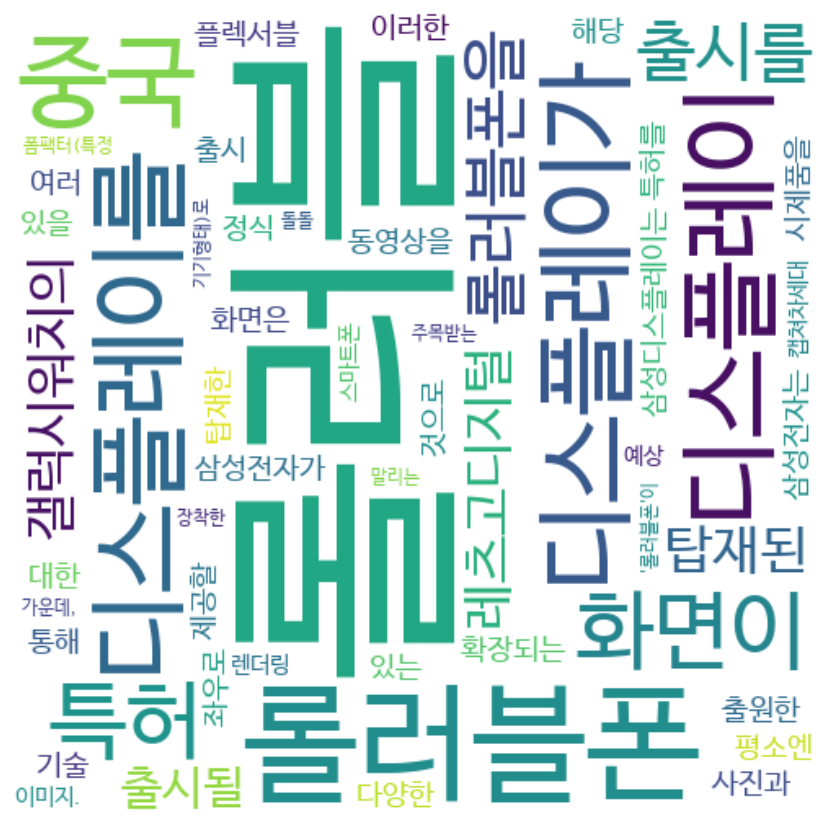

In [100]:
wc.generate_from_frequencies(dict(dic['tf-idf'][0]))
plt.figure(figsize=(15, 15))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
#wc.to_file('word.jpg')